<a href="https://colab.research.google.com/github/ashishkumarsahani/NLP_Demos/blob/main/Bigram_Language_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##This block is only for access of files using google drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded = drive.CreateFile({'id':"1sKXP2itFMLxBGFHRljQ0IOWIVksVKh6f"})   # replace the id with id of file you want to access
downloaded.GetContentFile('names.txt')        # replace the file name with your file

In [ ]:
words = open('names.txt','r').read().splitlines()

In [ ]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

In [ ]:
min(len(w) for w in words)

2

In [ ]:
max(len(w) for w in words)

15

**Bigram Language Model**

In [ ]:
b = {};
for w in words:
  chs = ['<S>']+list(w)+['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram,0) + 1;
    #print([ch1, ch2])

In [ ]:
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [ ]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [ ]:
import torch

In [ ]:
N = torch.zeros((28,28), dtype = torch.int32)

In [ ]:
chars = sorted(list(set(''.join(words))))
print(chars)

stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

print(stoi['a'])

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
0


In [ ]:
itos = {i:s for s,i in stoi.items()}

In [ ]:
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

In [ ]:


for w in words:
  chs = ['<S>']+list(w)+['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    N[stoi[ch1], stoi[ch2]] +=1;

In [ ]:
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

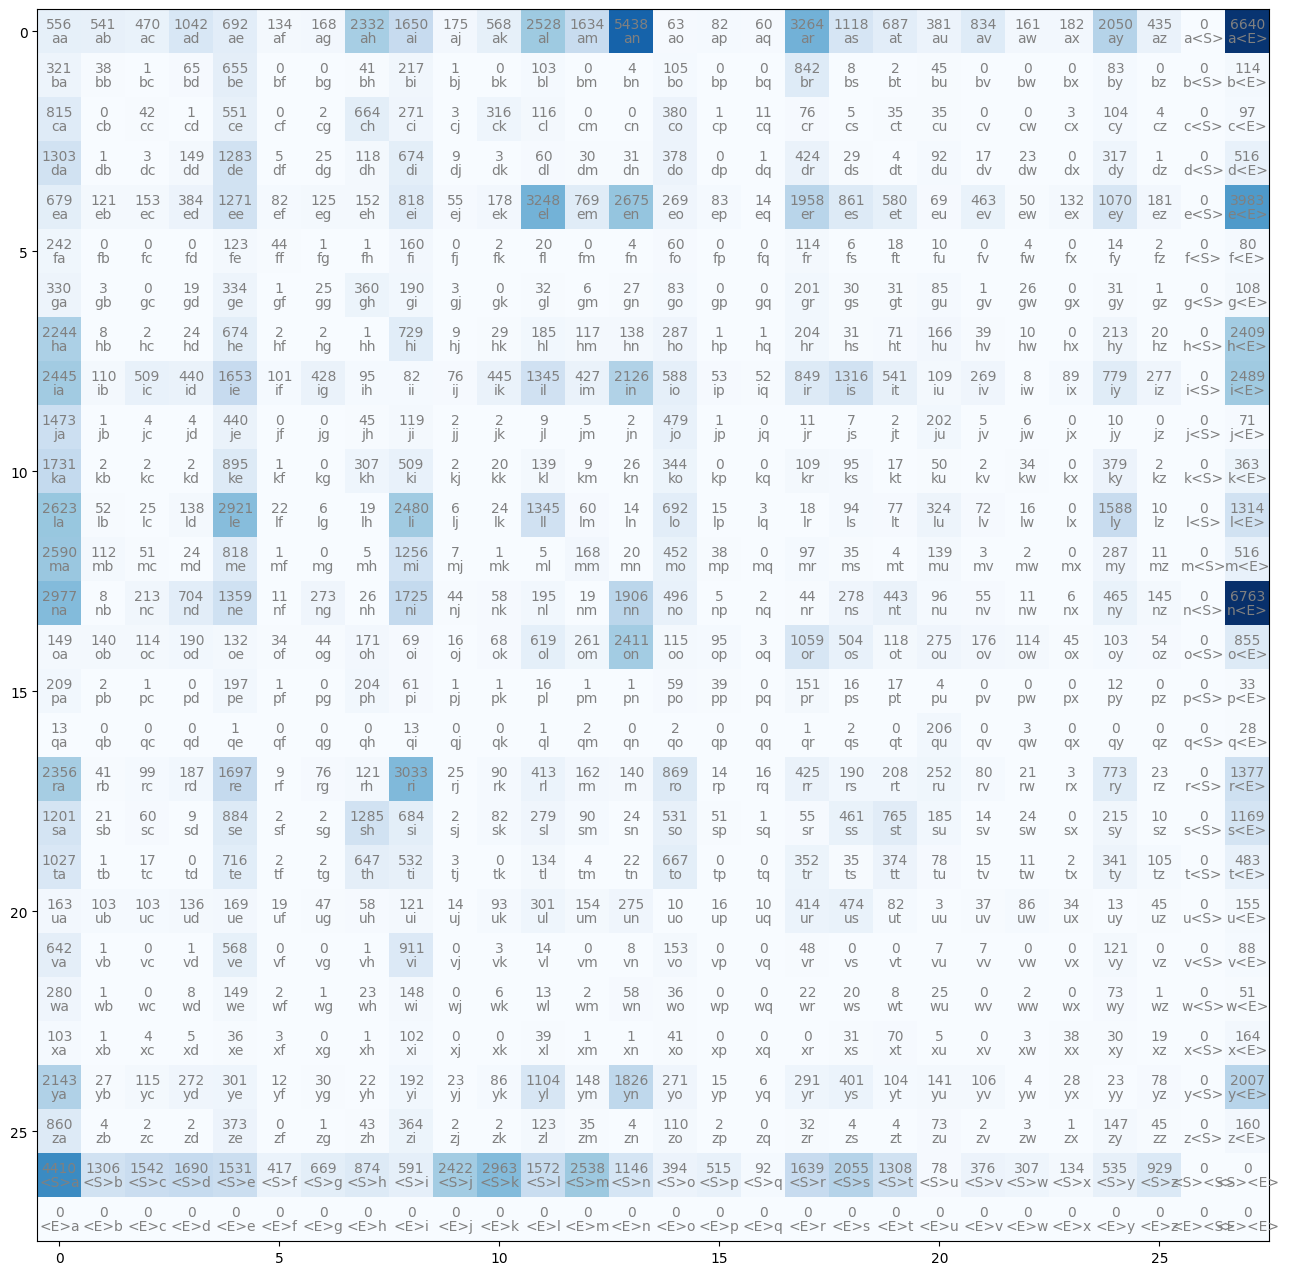

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,16))
plt.imshow(N, cmap='Blues')

for i in range(28):
  for j in range(28):
    chrstr = itos[i] + itos[j];
    plt.text(j,i, chrstr, ha = 'center', va = 'top', color = 'gray')
    plt.text(j,i, N[i,j].item(), ha = 'center', va = 'bottom', color = 'gray')


In [ ]:
N = torch.zeros((27,27), dtype = torch.int32)

In [ ]:
chars = sorted(list(set(''.join(words))))

stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

itos = {i:s for s,i in stoi.items()}

In [ ]:
for w in words:
  chs = ['.']+list(w)+['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    N[stoi[ch1], stoi[ch2]] +=1;

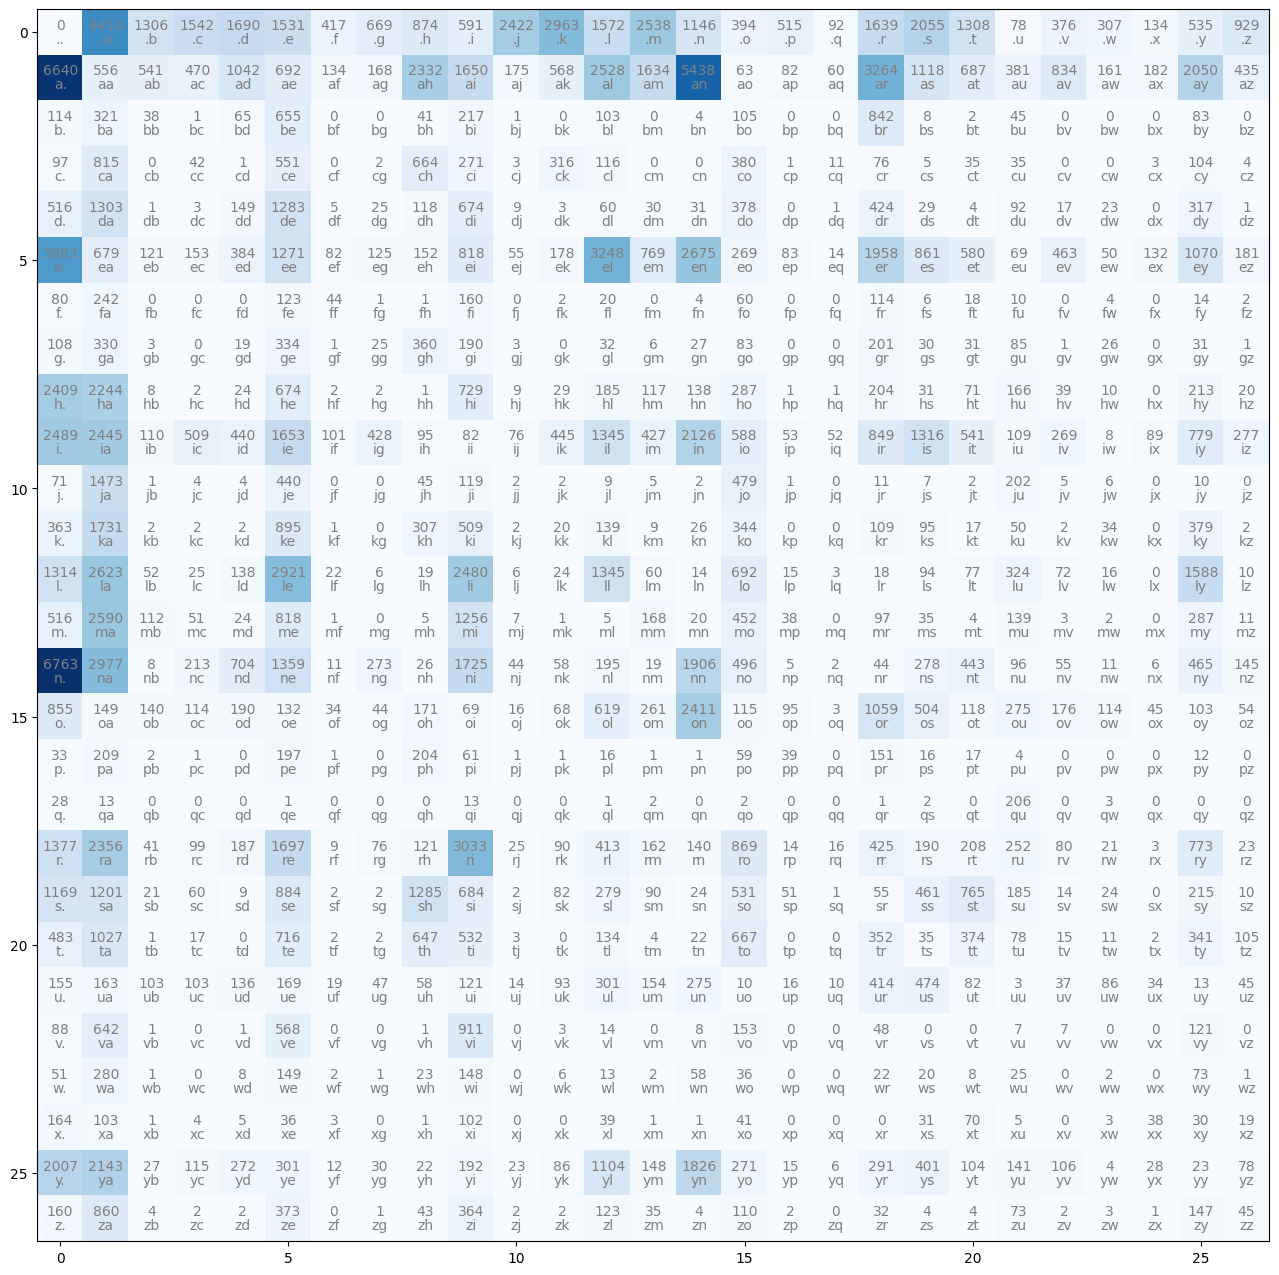

In [ ]:
plt.figure(figsize = (20,16))
plt.imshow(N, cmap='Blues')

for i in range(27):
  for j in range(27):
    chrstr = itos[i] + itos[j];
    plt.text(j,i, chrstr, ha = 'center', va = 'top', color = 'gray')
    plt.text(j,i, N[i,j].item(), ha = 'center', va = 'bottom', color = 'gray')

In [ ]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [ ]:
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [ ]:
g = torch.Generator().manual_seed(123453432)
p_test = torch.rand(3, generator=g)
p_test = p_test/p_test.sum()
p_test

tensor([0.4637, 0.1532, 0.3831])

In [ ]:
torch.multinomial(p_test, num_samples = 20, replacement = True, generator = g)

tensor([0, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0])

In [ ]:
g = torch.Generator().manual_seed(123453432)
ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
itos[ix]

'm'

In [ ]:
g = torch.Generator().manual_seed(123453432)

for i in range(10):
  ix = 0
  word = [];
  while True:
    p = N[ix].float()
    p = p/p.sum()
    ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
    word.append(itos[ix])
    if(ix ==0):
      break
  print("".join(word))

macay.
thelanecate.
teongisynarionn.
nani.
e.
monsiylshisa.
liyasilla.
bra.
mieeven.
c.


In [ ]:
P = N.float()
print(P.shape)
print(P.sum(1, keepdims = True).shape)
P /= P.sum(1, keepdims = True)
print(P[0].sum())

torch.Size([27, 27])
torch.Size([27, 1])
tensor(1.)


In [ ]:
g = torch.Generator().manual_seed(123453432)

for i in range(10):
  ix = 0
  word = [];
  while True:
    p = P[ix];
    ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
    word.append(itos[ix])
    if(ix ==0):
      break
  print("".join(word))

macay.
thelanecate.
teongisynarionn.
nani.
e.
monsiylshisa.
liyasilla.
bra.
mieeven.
c.


In [ ]:
log_liklihood = 0.0
n = 0;

for w in words:
  chs = ['.']+list(w)+['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2];
    prob = P[ix1, ix2];
    log_prob = torch.log(prob)
    log_liklihood += log_prob;
    n +=1;
    #print(f'{ch1}{ch2}: {log_prob:.4f}')
print(f'{log_liklihood =}')
NegLogLiklihood = -log_liklihood;
print(f'{NegLogLiklihood = }')
print(f'Mean Negative Log Liklihood = {NegLogLiklihood/n: .4f}')

log_liklihood =tensor(-559891.7500)
NegLogLiklihood = tensor(559891.7500)
Mean Negative Log Liklihood =  2.4541


In [ ]:
log_liklihood = 0.0
n = 0;

for w in ['ashish']:
  chs = ['.']+list(w)+['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2];
    prob = P[ix1, ix2];
    log_prob = torch.log(prob)
    log_liklihood += log_prob;
    n +=1;
    #print(f'{ch1}{ch2}: {log_prob:.4f}')
print(f'{log_liklihood =}')
NegLogLiklihood = -log_liklihood;
print(f'{NegLogLiklihood = }')
print(f'Mean Negative Log Liklihood = {NegLogLiklihood/n: .4f}')

log_liklihood =tensor(-15.1744)
NegLogLiklihood = tensor(15.1744)
Mean Negative Log Liklihood =  2.1678


**Neural Network Approach**

Create a training set of all bigrams (x,y)![Screenshot 2024-01-07 at 10.33.40 PM.png](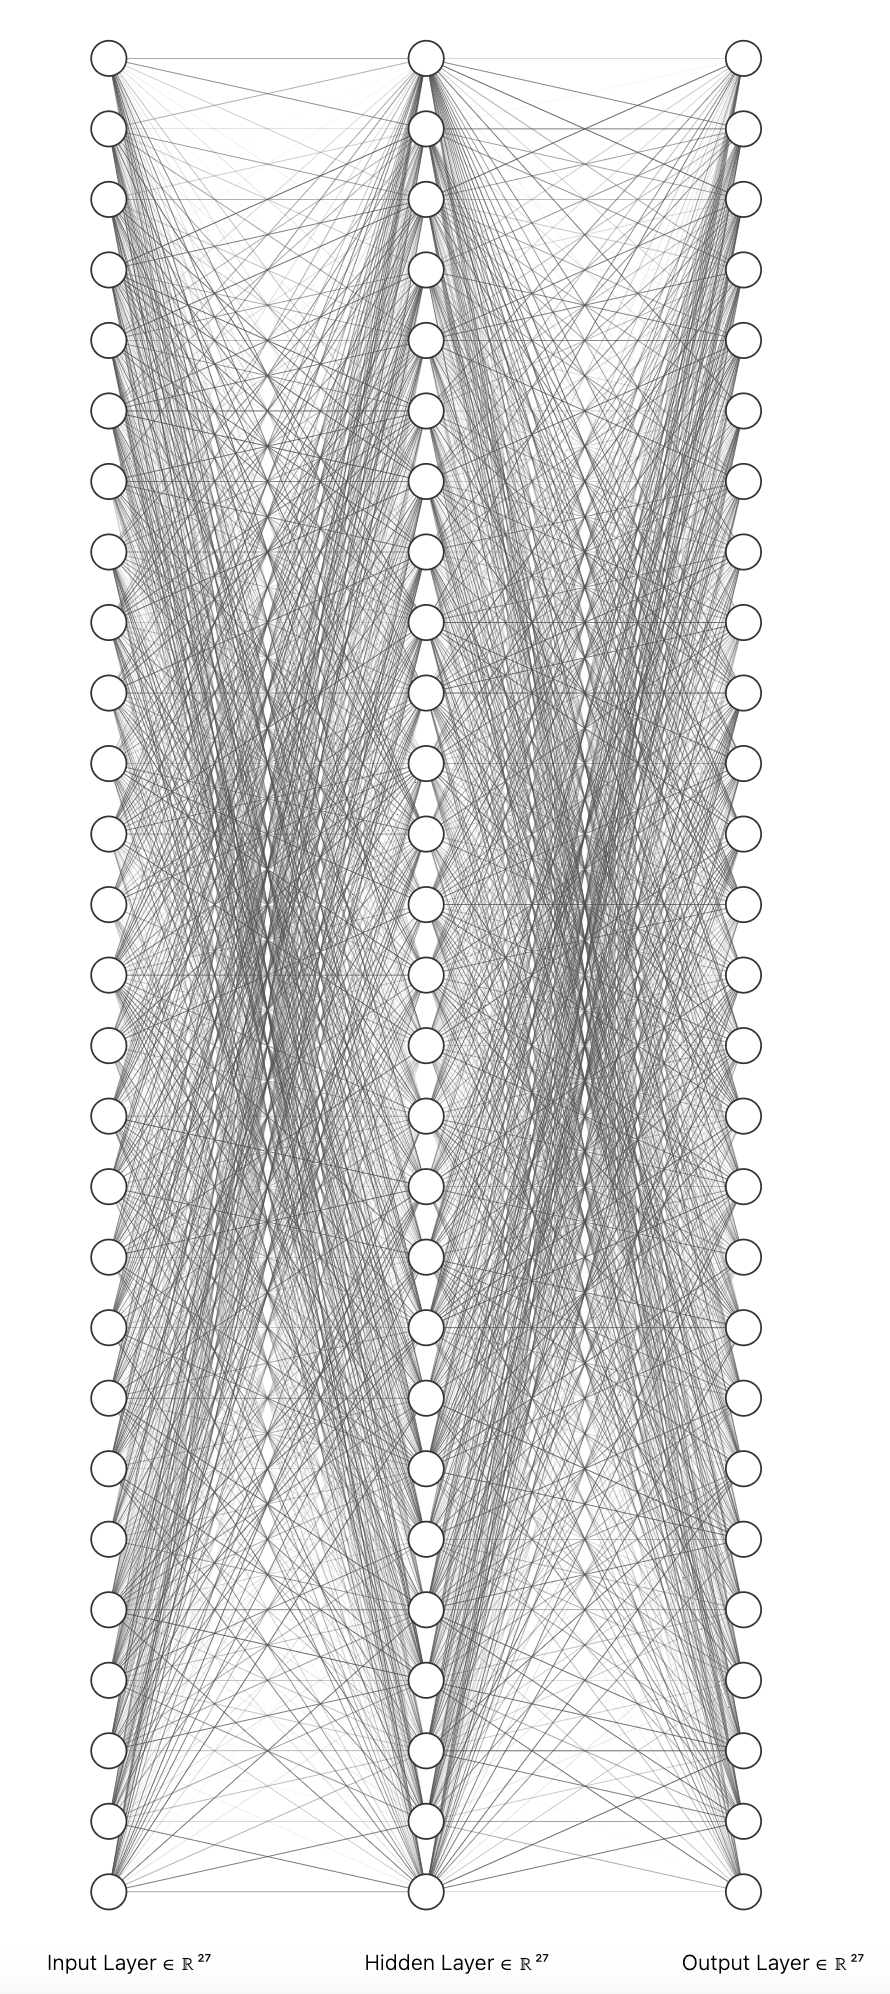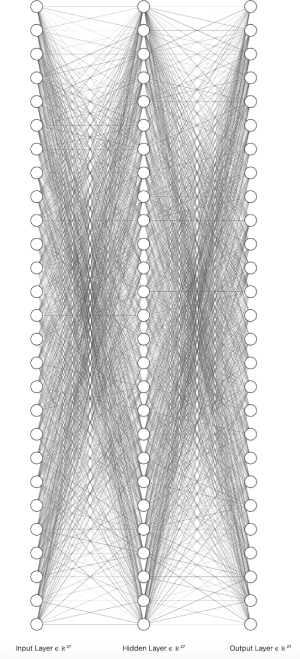).

In [ ]:
xs, ys = [], [];

for w in words[:1]:
  chs = ['.']+list(w)+['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    print([ch1, ch2])
    ix1 = stoi[ch1]
    ix2 = stoi[ch2];
    xs.append(ix1);
    ys.append(ix2);

xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(xs)
print(ys)

['.', 'e']
['e', 'm']
['m', 'm']
['m', 'a']
['a', '.']
tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In [ ]:
import torch.nn.functional as F

In [ ]:
xenc = F.one_hot(xs, num_classes = 27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
xenc.shape

torch.Size([5, 27])

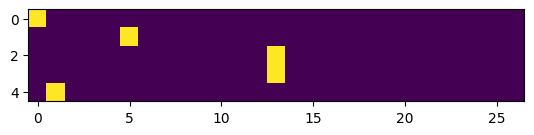

In [ ]:
plt.imshow(xenc)

In [ ]:
W = torch.randn((27,1))

In [ ]:
W

tensor([[-2.0931],
        [-1.5024],
        [ 2.7949],
        [-1.3035],
        [-0.2233],
        [ 0.5600],
        [-0.9991],
        [ 0.2716],
        [-0.3570],
        [-1.0850],
        [-0.1800],
        [-0.4481],
        [ 1.0786],
        [-1.1130],
        [-0.2496],
        [-0.8359],
        [ 0.4787],
        [ 0.3884],
        [ 1.2328],
        [ 0.4689],
        [-0.5456],
        [ 0.5024],
        [-1.2097],
        [ 0.5448],
        [-0.7106],
        [ 1.3318],
        [-1.5991]])

In [ ]:
xenc@W

tensor([[-2.0931],
        [ 0.5600],
        [-1.1130],
        [-1.1130],
        [-1.5024]])

In [ ]:
W = torch.randn((27,27))
logits = xenc@W
counts = logits.exp() #Equivalent to N
prob = counts/ counts.sum(1, keepdims = True)

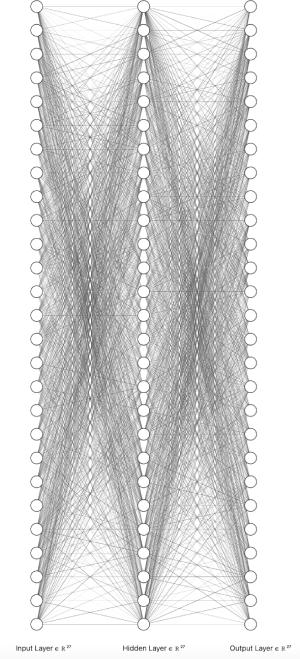

In [ ]:
prob[0]

tensor([0.0066, 0.0036, 0.0095, 0.0546, 0.0168, 0.0100, 0.0657, 0.0133, 0.0182,
        0.0238, 0.0084, 0.0250, 0.0407, 0.0108, 0.1509, 0.0115, 0.0619, 0.0389,
        0.0055, 0.0064, 0.0167, 0.0072, 0.0803, 0.2159, 0.0700, 0.0135, 0.0142])

In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
#Randomly initialize 27 Neuron weights with 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g)

In [ ]:
xenc = F.one_hot(xs, num_classes = 27).float() #Input to network as one-hot encodings
logits = xenc@W   #predicted log counts
counts = logits.exp() #counts equivalent to N always positive
prob = counts/ counts.sum(1, keepdims = True) #probabilities for the next caharacter
#Last two lines together are called as the softmax

In [ ]:
logits.shape

torch.Size([5, 27])

In [ ]:
nlls = torch.zeros(5)

for i in range(5):
  #i-th bigram
  x = xs[i].item(); #input character index
  y = ys[i].item(); #label caharacter index
  print('------');
  print(f'bigram example {i+1}:{itos[x]}{itos[y]} (indices {x}, {y})')
  print(f'Input to the neural net: {x}');
  print(f'Output probabilities from the Neural Net: {prob[i]}');
  print(f'Label (actual next character): {y}');
  p = prob[i,y]
  print(f'Probability assigned to the actual next character: {p.item()}')
  logp = torch.log(p);
  print(f'Log liklihood of the actual next character: {logp}')
  nlls[i] = -logp
  print(f'Negative Log liklihood of the actual next character: {nlls[i]}')

print(f'===========\nMean Negative Log liklihood i.e. loss: {nlls.mean().item()}')

------
bigram example 1:.e (indices 0, 5)
Input to the neural net: 0
Output probabilities from the Neural Net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
Label (actual next character): 5
Probability assigned to the actual next character: 0.01228625513613224
Log liklihood of the actual next character: -4.399273872375488
Negative Log liklihood of the actual next character: 4.399273872375488
------
bigram example 2:em (indices 5, 13)
Input to the neural net: 5
Output probabilities from the Neural Net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
Label (actual next character): 13
Probability assigned to